In [1]:
import os
import glob

import numpy as np

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

In [2]:
pulsar_name = '0531+21'
files = sorted(glob.glob('results_by_08.05.2019/gp_plot_txt/*' + pulsar_name + '*.csv'))

In [112]:
file = files[48]
profile = np.genfromtxt(file, skip_header=6)
profile = profile/np.max(profile)

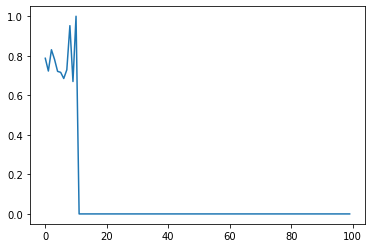

In [113]:
plt.close()
plt.plot(profile)
plt.show()

In [114]:
y = profile
x = range(len(profile))

In [115]:
def power_func(x, a, b, k): 
    return [a**float(i - b) - k for i in x]

def gaus(x,a,x0,sigma): 
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def exp_tail(x, a, b, k):
    return a*np.exp(x-b) - k

def linea_func(x, k, b):
    return k*x + b

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


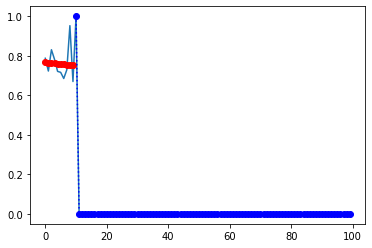

In [116]:
threshold = 10 
a = 1
b = 1 
k = 1 
popt_power_1, pcov = curve_fit(linea_func,x[:threshold],y[:threshold],p0=[b, k], maxfev=20000) 
 
popt_power_2, pcov = curve_fit(power_func,x[threshold:],y[threshold:],p0=[a, b, k])

plt.plot(x,y,label='data') 
plt.plot(x[:threshold],linea_func(x[:threshold],*popt_power_1),'ro:',label='fit_gaus') 
plt.plot(x[threshold:],power_func(x[threshold:],*popt_power_2),'bo:',label='fit_power') 
#plt.legend() 
plt.show()

In [118]:
popt_power_2

array([ 3.96189818e-10,  9.99999985e+00, -6.05844091e-12])

c:\users\professional\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


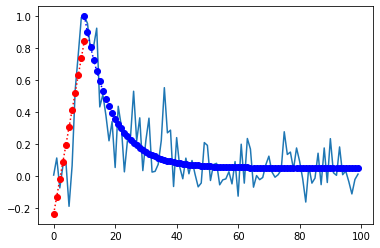

In [111]:
for file in files:
    profile = np.genfromtxt(file, skip_header=6)
    profile = profile/np.max(profile)
    
    y = profile
    x = range(len(profile))
    
    plt.close()
    try:
        threshold = 10 
        a = 1
        b = 1 
        k = 1 
        popt_power_1, pcov = curve_fit(linea_func,x[:threshold +1],y[:threshold+1],p0=[b, k], maxfev=20000) 

        popt_power_2, pcov = curve_fit(power_func,x[threshold:],y[threshold:],p0=[a, b, k])

        plt.plot(x,y,label='data') 
        plt.plot(x[:threshold+1],linea_func(x[:threshold+1],*popt_power_1),'ro:',label='fit_gaus') 
        plt.plot(x[threshold:],power_func(x[threshold:],*popt_power_2),'bo:',label='fit_power') 
        plt.savefig('./part_fit_res/' + os.path.basename(file)[:-4] + '.png', format='png')
    except (RuntimeError, TypeError):
        plt.plot(x,y,label='data') 
        plt.savefig('./part_fit_res/' + os.path.basename(file)[:-4] + '.png', format='png')

In [91]:
len(y)

12